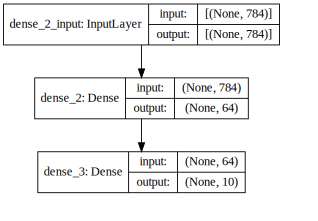

In [12]:
from keras.models import load_model
model = load_model('mnist_mlp_model.h5')

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=64).create(prog='dot', format='svg'))

In [17]:
from keras.utils import np_utils
from keras.datasets import mnist
import numpy as np
from numpy import argmax

# 1. 실무에 사용할 데이터 준비하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_test = np_utils.to_categorical(y_test)
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]

# 2. 모델 불러오기
from keras.models import load_model
model = load_model('mnist_mlp_model.h5')

# 3. 모델 사용하기
yhat = np.argmax(model.predict(xhat), axis=-1) # model.predict_classes() deprecated

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))


True : 2, Predict : 2
True : 0, Predict : 0
True : 9, Predict : 9
True : 6, Predict : 6
True : 2, Predict : 2
